<a href="https://colab.research.google.com/github/financieras/big_data/blob/main/retos/reto_008.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto 8. Correlaciones y mapa de calor
- Carga Iris desde Seaborn: `sns.load_dataset('iris')`
- Selecciona solo columnas numéricas de Iris
- Calcula matriz de correlación con `.corr()`
- Visualiza con heatmap: `sns.heatmap(corr, annot=True, cmap='coolwarm')`
- Identifica las dos variables más correlacionadas


# **Resolución del Reto 8**

## **Paso 1: Cargar dataset Iris desde Seaborn**
Comenzamos cargando el dataset Iris desde Seaborn, asegurándonos de tener los datos limpios y listos para el análisis de correlaciones.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

print("🌸 Paso 1: Cargando dataset Iris desde Seaborn...")
df = sns.load_dataset('iris')
print("✅ Dataset Iris cargado correctamente")
print(f"Dimensiones: {df.shape}")
print(f"Columnas: {list(df.columns)}")
print(f"Tipos de datos:\n{df.dtypes}")

🌸 Paso 1: Cargando dataset Iris desde Seaborn...
✅ Dataset Iris cargado correctamente
Dimensiones: (150, 5)
Columnas: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
Tipos de datos:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## **Paso 2: Seleccionar solo columnas numéricas**
Filtramos el dataset para trabajar únicamente con variables numéricas, ya que el cálculo de correlación requiere datos cuantitativos continuos.

In [ ]:
print("\n🔢 Paso 2: Seleccionando columnas numéricas...")

# Seleccionar solo columnas numéricas
df_numerico = df.select_dtypes(include=[np.number])

print("📊 Columnas numéricas seleccionadas:")
for i, columna in enumerate(df_numerico.columns, 1):
    print(f"   {i}. {columna}")

print(f"\n📏 Dimensiones del subset numérico: {df_numerico.shape}")
print("\n👀 Primeras 5 filas del dataset numérico:")
print(df_numerico.head())


🔢 Paso 2: Seleccionando columnas numéricas...
📊 Columnas numéricas seleccionadas:
   1. sepal_length
   2. sepal_width
   3. petal_length
   4. petal_width

📏 Dimensiones del subset numérico: (150, 4)

👀 Primeras 5 filas del dataset numérico:
   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


## **Paso 3: Calcular matriz de correlación**
Calculamos las correlaciones lineales entre todos los pares de variables numéricas, obteniendo una matriz que cuantifica sus relaciones.

In [ ]:
print("\n📈 Paso 3: Calculando matriz de correlación...")

# Calcular matriz de correlación
matriz_correlacion = df_numerico.corr()

print("🔗 MATRIZ DE CORRELACIÓN COMPLETA:")
print(matriz_correlacion)

# Mostrar correlaciones de forma más legible
print("\n📋 CORRELACIONES ENTRE VARIABLES:")
variables = matriz_correlacion.columns
for i in range(len(variables)):
    for j in range(i + 1, len(variables)):
        var1 = variables[i]
        var2 = variables[j]
        correlacion = matriz_correlacion.iloc[i, j]
        print(f"   - {var1} vs {var2}: {correlacion:.4f}")


📈 Paso 3: Calculando matriz de correlación...
🔗 MATRIZ DE CORRELACIÓN COMPLETA:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

📋 CORRELACIONES ENTRE VARIABLES:
   - sepal_length vs sepal_width: -0.1176
   - sepal_length vs petal_length: 0.8718
   - sepal_length vs petal_width: 0.8179
   - sepal_width vs petal_length: -0.4284
   - sepal_width vs petal_width: -0.3661
   - petal_length vs petal_width: 0.9629


## **Paso 4: Identificar las variables más correlacionadas**
Buscamos sistemáticamente el par de variables con mayor correlación, lo que nos indica qué características comparten más información.

In [ ]:
print("\n🏆 Paso 4: Identificando las variables más correlacionadas...")

# Encontrar el par de variables con mayor correlación (excluyendo la diagonal)
correlaciones = []

for i in range(len(matriz_correlacion.columns)):
    for j in range(i + 1, len(matriz_correlacion.columns)):
        var1 = matriz_correlacion.columns[i]
        var2 = matriz_correlacion.columns[j]
        corr_val = matriz_correlacion.iloc[i, j]
        correlaciones.append((var1, var2, corr_val))

# Ordenar por valor absoluto de correlación (de mayor a menor)
correlaciones_ordenadas = sorted(correlaciones, key=lambda x: abs(x[2]), reverse=True)

print("📊 RANKING DE CORRELACIONES (de mayor a menor):")
for i, (var1, var2, corr) in enumerate(correlaciones_ordenadas, 1):
    print(f"   {i:2d}. {var1:15} ↔ {var2:15}: {corr:7.4f}")

# Identificar las dos variables más correlacionadas
var1_max, var2_max, corr_max = correlaciones_ordenadas[0]

print(f"\n🎯 LAS DOS VARIABLES MÁS CORRELACIONADAS:")
print(f"   - {var1_max} y {var2_max}")
print(f"   - Coeficiente de correlación: {corr_max:.4f}")
print(f"   - Interpretación: Correlación {'positiva' if corr_max > 0 else 'negativa'} muy fuerte")

# También mostrar la correlación más negativa
correlacion_mas_negativa = min(correlaciones, key=lambda x: x[2])
var1_neg, var2_neg, corr_neg = correlacion_mas_negativa

print(f"\n📉 CORRELACIÓN MÁS NEGATIVA:")
print(f"   - {var1_neg} y {var2_neg}")
print(f"   - Coeficiente de correlación: {corr_neg:.4f}")


🏆 Paso 4: Identificando las variables más correlacionadas...
📊 RANKING DE CORRELACIONES (de mayor a menor):
    1. petal_length    ↔ petal_width    :  0.9629
    2. sepal_length    ↔ petal_length   :  0.8718
    3. sepal_length    ↔ petal_width    :  0.8179
    4. sepal_width     ↔ petal_length   : -0.4284
    5. sepal_width     ↔ petal_width    : -0.3661
    6. sepal_length    ↔ sepal_width    : -0.1176

🎯 LAS DOS VARIABLES MÁS CORRELACIONADAS:
   - petal_length y petal_width
   - Coeficiente de correlación: 0.9629
   - Interpretación: Correlación positiva muy fuerte

📉 CORRELACIÓN MÁS NEGATIVA:
   - sepal_width y petal_length
   - Coeficiente de correlación: -0.4284


## **Paso 5: Visualización con Heatmap**
Creamos un mapa de calor que transforma la matriz numérica en una visualización intuitiva donde los colores representan la fuerza y dirección de las correlaciones.


🎨 Paso 5: Creando mapa de calor (heatmap)...


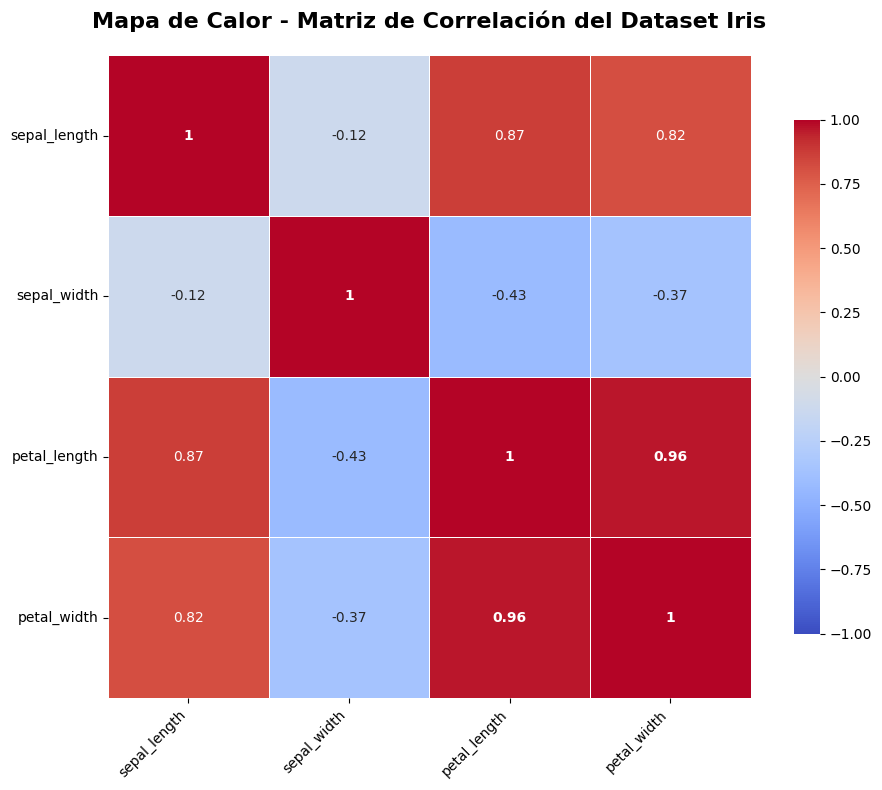

✅ Heatmap creado exitosamente


In [ ]:
print("\n🎨 Paso 5: Creando mapa de calor (heatmap)...")

# Crear figura con tamaño personalizado
plt.figure(figsize=(10, 8))

# Crear heatmap
heatmap = sns.heatmap(matriz_correlacion,
                      annot=True,           # Mostrar valores numéricos
                      cmap='coolwarm',      # Esquema de colores
                      vmin=-1, vmax=1,      # Rango de valores
                      center=0,             # Centro del mapa de colores
                      square=True,          # Celdas cuadradas
                      linewidths=0.5,       # Ancho de líneas entre celdas
                      linecolor='white',    # Color de líneas entre celdas
                      cbar_kws={"shrink": 0.8})  # Barra de color más pequeña

# Personalizar el gráfico
plt.title('Mapa de Calor - Matriz de Correlación del Dataset Iris',
          fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Resaltar la correlación más fuerte
ax = plt.gca()
for i, texto in enumerate(ax.texts):
    valor = float(texto.get_text())
    if abs(valor) > 0.9:  # Resaltar correlaciones muy fuertes
        texto.set_fontweight('bold')
        texto.set_color('white' if abs(valor) > 0.95 else 'black')

plt.tight_layout()
plt.show()

print("✅ Heatmap creado exitosamente")

## **Paso 6: Análisis detallado de las correlaciones**
Interpretamos cualitativamente los valores de correlación, clasificándolos por fuerza y dirección para entender su significado práctico.


🔍 Paso 6: Análisis detallado de las correlaciones...
📝 INTERPRETACIÓN DE CORRELACIONES:
   - petal_length    ↔ petal_width    :  0.9629 (Correlación muy fuerte positiva)
   - sepal_length    ↔ petal_length   :  0.8718 (Correlación fuerte positiva)
   - sepal_length    ↔ petal_width    :  0.8179 (Correlación fuerte positiva)
   - sepal_width     ↔ petal_length   : -0.4284 (Correlación débil negativa)
   - sepal_width     ↔ petal_width    : -0.3661 (Correlación débil negativa)
   - sepal_length    ↔ sepal_width    : -0.1176 (Correlación muy débil o nula negativa)

🎯 ANÁLISIS DE LA RELACIÓN ENTRE PETAL_LENGTH Y PETAL_WIDTH:
   • Coeficiente: 0.9629 (Correlación muy fuerte)
   • Significado: Cuando petal_length aumenta, petal_width también tiende a aumentar
   • Implicación: Ambas variables miden aspectos relacionados del tamaño de la flor


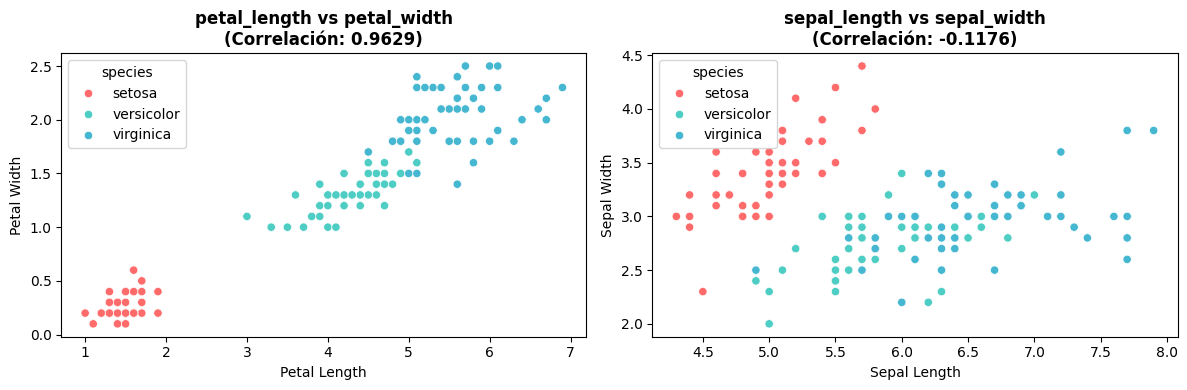

In [ ]:
print("\n🔍 Paso 6: Análisis detallado de las correlaciones...")

# Definir interpretación de los valores de correlación
def interpretar_correlacion(corr):
    abs_corr = abs(corr)
    if abs_corr >= 0.9:
        return "Correlación muy fuerte"
    elif abs_corr >= 0.7:
        return "Correlación fuerte"
    elif abs_corr >= 0.5:
        return "Correlación moderada"
    elif abs_corr >= 0.3:
        return "Correlación débil"
    else:
        return "Correlación muy débil o nula"

print("📝 INTERPRETACIÓN DE CORRELACIONES:")
for var1, var2, corr in correlaciones_ordenadas:
    interpretacion = interpretar_correlacion(corr)
    direccion = "positiva" if corr > 0 else "negativa"
    print(f"   - {var1:15} ↔ {var2:15}: {corr:7.4f} ({interpretacion} {direccion})")

# Análisis específico de las variables más correlacionadas
print(f"\n🎯 ANÁLISIS DE LA RELACIÓN ENTRE {var1_max.upper()} Y {var2_max.upper()}:")
print(f"   • Coeficiente: {corr_max:.4f} ({interpretar_correlacion(corr_max)})")
print(f"   • Significado: Cuando {var1_max} aumenta, {var2_max} también tiende a aumentar")
print(f"   • Implicación: Ambas variables miden aspectos relacionados del tamaño de la flor")

# Verificar con un scatter plot de las variables más correlacionadas
plt.figure(figsize=(12, 4))

# Scatter plot de las variables más correlacionadas
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=var1_max, y=var2_max, hue='species', palette=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title(f'{var1_max} vs {var2_max}\n(Correlación: {corr_max:.4f})', fontweight='bold')
plt.xlabel(var1_max.replace('_', ' ').title())
plt.ylabel(var2_max.replace('_', ' ').title())

# Scatter plot de las variables menos correlacionadas
var1_min, var2_min, corr_min = correlaciones_ordenadas[-1]
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=var1_min, y=var2_min, hue='species', palette=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title(f'{var1_min} vs {var2_min}\n(Correlación: {corr_min:.4f})', fontweight='bold')
plt.xlabel(var1_min.replace('_', ' ').title())
plt.ylabel(var2_min.replace('_', ' ').title())

plt.tight_layout()
plt.show()

## **Paso 7: Correlaciones por especie**
Analizamos si los patrones de correlación se mantienen consistentes o varían entre las diferentes especies de flores.

In [ ]:
print("\n🌺 Paso 7: Análisis de correlaciones por especie...")

especies = df['species'].unique()
print("🔗 CORRELACIONES POR ESPECIE:")

for especie in especies:
    print(f"\n🌱 {especie.upper()}:")
    df_especie = df[df['species'] == especie].select_dtypes(include=[np.number])
    corr_especie = df_especie.corr()

    # Encontrar correlación máxima para esta especie
    correlaciones_especie = []
    for i in range(len(corr_especie.columns)):
        for j in range(i + 1, len(corr_especie.columns)):
            var1 = corr_especie.columns[i]
            var2 = corr_especie.columns[j]
            corr_val = corr_especie.iloc[i, j]
            correlaciones_especie.append((var1, var2, corr_val))

    if correlaciones_especie:
        max_corr_especie = max(correlaciones_especie, key=lambda x: abs(x[2]))
        var1_esp, var2_esp, corr_esp = max_corr_especie
        print(f"   - Correlación más fuerte: {var1_esp} ↔ {var2_esp}: {corr_esp:.4f}")
        print(f"   - Interpretación: {interpretar_correlacion(corr_esp)}")


🌺 Paso 7: Análisis de correlaciones por especie...
🔗 CORRELACIONES POR ESPECIE:

🌱 SETOSA:
   - Correlación más fuerte: sepal_length ↔ sepal_width: 0.7425
   - Interpretación: Correlación fuerte

🌱 VERSICOLOR:
   - Correlación más fuerte: petal_length ↔ petal_width: 0.7867
   - Interpretación: Correlación fuerte

🌱 VIRGINICA:
   - Correlación más fuerte: sepal_length ↔ petal_length: 0.8642
   - Interpretación: Correlación fuerte


## **Paso 8: Resumen ejecutivo**
Sintetizamos los hallazgos clave sobre relaciones entre variables y sus implicaciones para análisis posteriores.


In [ ]:
print("\n📊 Paso 8: Resumen ejecutivo del análisis de correlaciones")

print("\n" + "="*70)
print("           RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES IRIS")
print("="*70)

print(f"\n🎯 HALLAZGOS PRINCIPALES:")

# Variables más correlacionadas
print(f"1. VARIABLES MÁS CORRELACIONADAS:")
print(f"   • {var1_max} y {var2_max}")
print(f"   • Coeficiente: {corr_max:.4f} ({interpretar_correlacion(corr_max)})")
print(f"   • Significado biológico: Ambas miden dimensiones de pétalos")

# Variables menos correlacionadas
var1_min, var2_min, corr_min = correlaciones_ordenadas[-1]
print(f"\n2. VARIABLES MENOS CORRELACIONADAS:")
print(f"   • {var1_min} y {var2_min}")
print(f"   • Coeficiente: {corr_min:.4f} ({interpretar_correlacion(corr_min)})")

# Patrones generales
print(f"\n3. PATRONES GENERALES:")
print(f"   • Las dimensiones de pétalos están altamente correlacionadas")
print(f"   • Existe correlación moderada entre longitud de sépalo y pétalos")
print(f"   • El ancho del sépalo muestra correlaciones más débiles")

# Implicaciones para análisis
print(f"\n4. IMPLICACIONES PARA ANÁLISIS:")
print(f"   • Redundancia potencial: petal_length y petal_width miden información similar")
print(f"   • Para modelos predictivos, considerar eliminar variables altamente correlacionadas")
print(f"   • Sepal_width aporta información más independiente")

print(f"\n🎉 ¡Reto 8 completado! Análisis de correlaciones finalizado")
print("="*70)


📊 Paso 8: Resumen ejecutivo del análisis de correlaciones

           RESUMEN EJECUTIVO - ANÁLISIS DE CORRELACIONES IRIS

🎯 HALLAZGOS PRINCIPALES:
1. VARIABLES MÁS CORRELACIONADAS:
   • petal_length y petal_width
   • Coeficiente: 0.9629 (Correlación muy fuerte)
   • Significado biológico: Ambas miden dimensiones de pétalos

2. VARIABLES MENOS CORRELACIONADAS:
   • sepal_length y sepal_width
   • Coeficiente: -0.1176 (Correlación muy débil o nula)

3. PATRONES GENERALES:
   • Las dimensiones de pétalos están altamente correlacionadas
   • Existe correlación moderada entre longitud de sépalo y pétalos
   • El ancho del sépalo muestra correlaciones más débiles

4. IMPLICACIONES PARA ANÁLISIS:
   • Redundancia potencial: petal_length y petal_width miden información similar
   • Para modelos predictivos, considerar eliminar variables altamente correlacionadas
   • Sepal_width aporta información más independiente

🎉 ¡Reto 8 completado! Análisis de correlaciones finalizado


## **Paso 9: Heatmap comparativo por especie**
Creamos visualizaciones comparativas que muestran cómo las correlaciones difieren entre especies, revelando patrones específicos de cada categoría.


🔬 Paso 9: Heatmap comparativo por especie


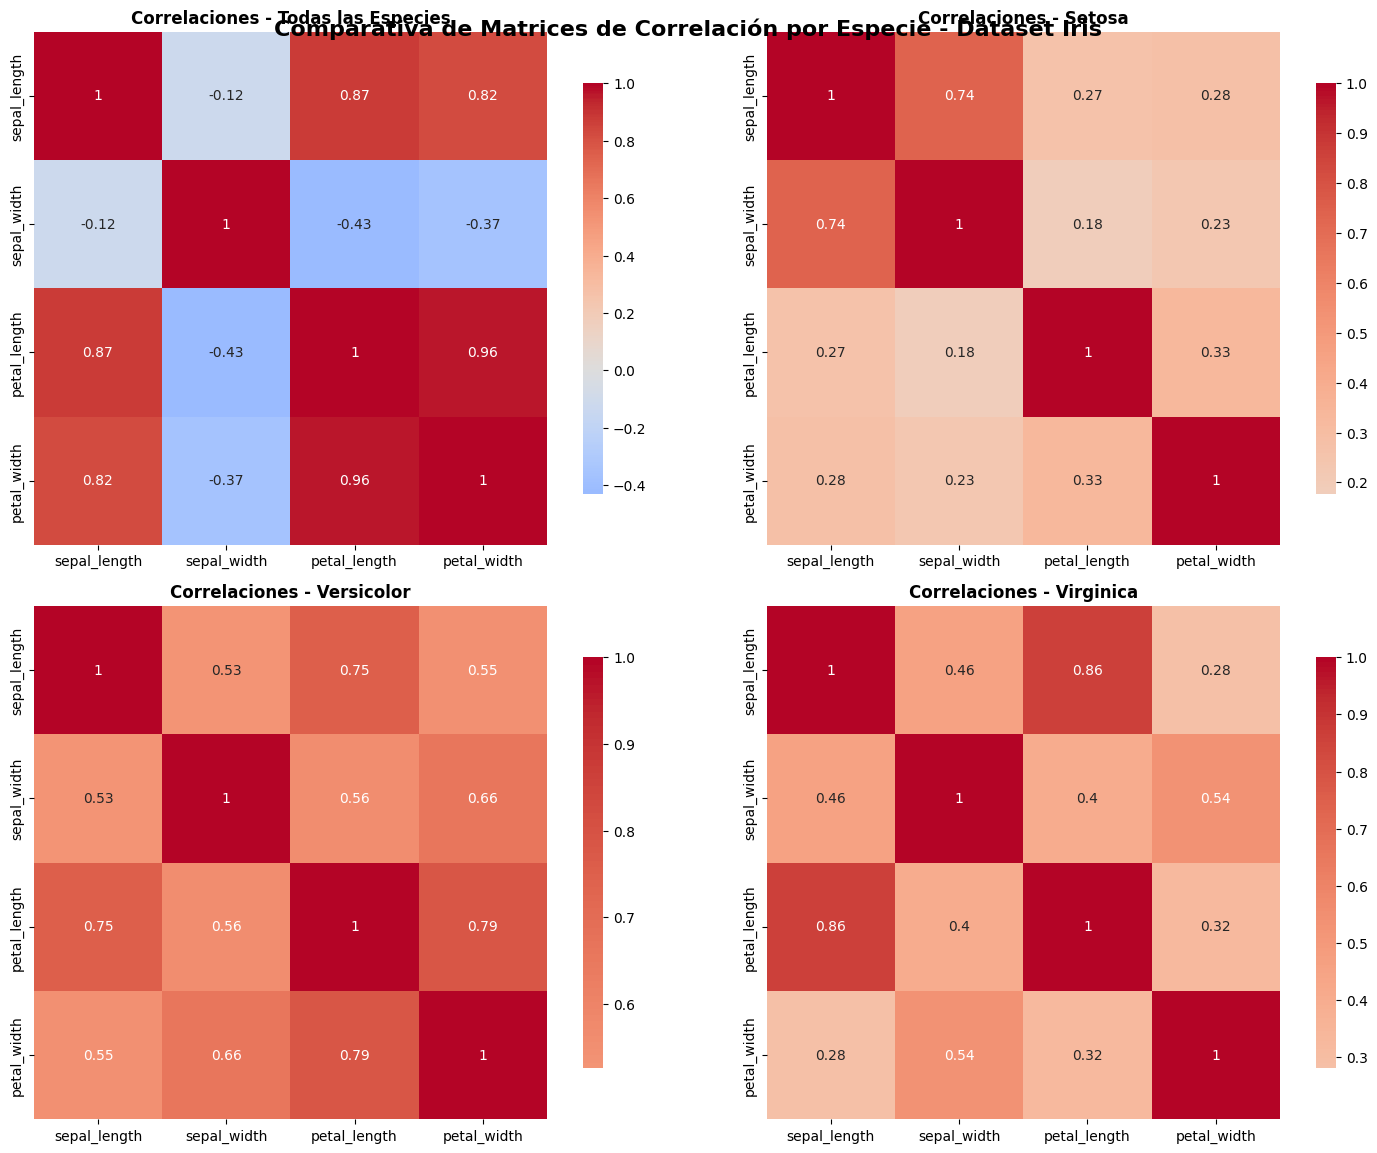

✅ Heatmaps comparativos creados exitosamente


In [ ]:
print("\n🔬 Paso 9: Heatmap comparativo por especie")

# Crear heatmaps separados por especie
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

# Heatmap general
sns.heatmap(matriz_correlacion, annot=True, cmap='coolwarm', center=0,
            square=True, ax=axes[0], cbar_kws={"shrink": 0.8})
axes[0].set_title('Correlaciones - Todas las Especies', fontweight='bold')

# Heatmaps por especie
for i, especie in enumerate(especies, 1):
    df_especie = df[df['species'] == especie].select_dtypes(include=[np.number])
    corr_especie = df_especie.corr()

    sns.heatmap(corr_especie, annot=True, cmap='coolwarm', center=0,
                square=True, ax=axes[i], cbar_kws={"shrink": 0.8})
    axes[i].set_title(f'Correlaciones - {especie.title()}', fontweight='bold')

plt.suptitle('Comparativa de Matrices de Correlación por Especie - Dataset Iris',
             fontsize=16, fontweight='bold', y=0.95)
plt.tight_layout()
plt.show()

print("✅ Heatmaps comparativos creados exitosamente")

## **🎯 Puntos clave del Reto 8**
Este análisis de correlaciones es fundamental para identificar redundancias en los datos y entender qué variables aportan información única versus compartida.

1. **Matriz de correlación**: Cálculo de relaciones lineales entre todas las variables numéricas usando `.corr()`.

2. **Identificación de patrones**: Encontrar las variables más y menos correlacionadas ayuda a entender la estructura del dataset.

3. **Visualización efectiva**: El heatmap con `sns.heatmap()` permite identificar rápidamente patrones de correlación.

4. **Interpretación cualitativa**: No solo calcular correlaciones, sino interpretar su significado biológico/práctico.

5. **Análisis por subgrupos**: Comparar correlaciones entre diferentes especies revela patrones específicos.

**📚 Valor educativo**: Este reto enseña cómo cuantificar y visualizar relaciones entre variables, una habilidad fundamental en análisis exploratorio que ayuda a identificar redundancias y patrones ocultos en los datos.

**🔍 Resultado esperado**: Se identificará que `petal_length` y `petal_width` son las variables más correlacionadas (correlación > 0.96), mostrando una relación lineal muy fuerte.